# IMDB movie-review sentiment-prediction

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

In [3]:
max_features = 10000
maxlen = 20

In [4]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(
num_words=max_features)

17465344/17464789 [==============================] - 24s 1us/step


In [6]:
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

In [11]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 4s 6ms/step - loss: 0.6625 - acc: 0.6347 - val_loss: 0.6065 - val_acc: 0.7000
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.5325 - acc: 0.7541 - val_loss: 0.5215 - val_acc: 0.7368
Epoch 3/10
625/625 [==============================] - 4s 6ms/step - loss: 0.4582 - acc: 0.7876 - val_loss: 0.4984 - val_acc: 0.7474
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4213 - acc: 0.8084 - val_loss: 0.4972 - val_acc: 0.7512
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3951 - acc: 0.8238 - val_loss: 0.4939 - val_acc: 0.7530
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3734 - acc: 0.8348 - val_loss: 0.4990 - val_acc: 0.7564
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3531 - acc: 0.8469 - val_loss: 0.5039 - val_acc: 0.7556
Epoch 8/10
625/625 [==============================] - 3s 5ms/step - loss: 0.

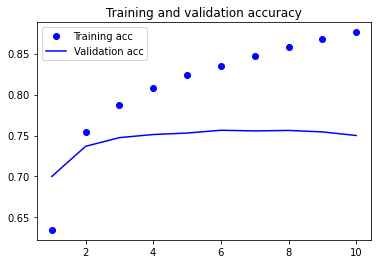

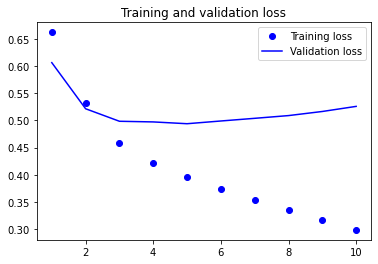

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()